In [1]:
import torch
from torch.nn.functional import cross_entropy
import numpy as np
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [2]:

model = AutoModelForSequenceClassification.from_pretrained('models/distilbert-base-uncased-finetuned-emotion/checkpoint-500/')
tokenizer = AutoTokenizer.from_pretrained('models/distilbert-base-uncased-finetuned-emotion/checkpoint-500/')

Data

In [3]:
emotions = load_dataset('SetFit/emotion')
emotions

Using custom data configuration SetFit--emotion-e444b7640ce3116e
Found cached dataset json (/home/vivek/.cache/huggingface/datasets/SetFit___json/SetFit--emotion-e444b7640ce3116e/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

Pipeline - Classifier

In [26]:
model.config.id2label = dict((zip(emotions['train']['label'], emotions['train']['label_text'])))

In [29]:
clf = pipeline('text-classification', model=model, tokenizer=tokenizer)
preds = clf(emotions['test']['text'], return_all_scores=False)

/home/vivek/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [31]:
pred_list = [p['label'] for p in preds]

#### Distribution of labels in the validation set

<AxesSubplot: >

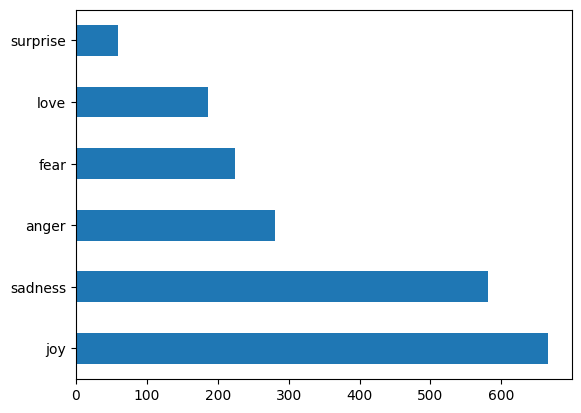

In [53]:
pd.Series(pred_list).value_counts().plot(kind='barh')